In [1]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [2]:


URL = input()

entries = []

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36 OPR/77.0.4054.277"

https://eksisozluk.com/flu-tv--5949024?p=1


In [3]:
r = requests.get(URL, headers={'User-Agent': USER_AGENT})
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
def page_counts(url):
    """
        Get page counts of the titles
    """
    r = requests.get(url, headers={'User-Agent':USER_AGENT})
    soup = BeautifulSoup(r.content, 'html.parser')
    try:
        last_page = soup.find('div', {'class':'pager'})['data-pagecount']
    except TypeError:
        last_page = 1
    return int(last_page)

In [5]:
page_count = page_counts(URL)

In [6]:
page_count

87

In [7]:
start = datetime.datetime.now()
rootURL = URL[:-1]
for i in range(int(page_count) + 1):   ##pagecount
    
    URL_ = rootURL + str(i)
    r = requests.get(URL_, headers={'User-Agent': USER_AGENT})
    soup2 = BeautifulSoup(r.text, 'html.parser')
    entry = soup2.find('div', {'class':'content'}) # find entry content
    entry_date = soup2.find('a', {'class':'entry-date permalink'}) # find date of the entry
    while entry is not None: # iterate until entry object not None 
        data = {
            'Entry': entry.get_text(separator=" ").replace('\n','').replace('\r', '').replace('\t', '').replace('    ', '').replace('bkz: ', '').replace('---  spoiler  ---', ''),# clear the contents of the entry from unnecessary things
            'Date': entry_date.text[:10],
        }
        entries.append(data)
        entry = entry.find_next('div', {'class':'content'}) # find next entry content
        entry_date = entry_date.find_next('a', {'class':'entry-date permalink'}) # find next date of the entry
        
end = datetime.datetime.now()
end-start


In [9]:
entries

[{'Entry': " ilker canikligil 'in kanalını flu tv ismine çevirmişler ve  olmaz öyle saçma şey  programını buraya taşımışlar https://www.youtube.com/watch?v=ouchfykxjik ",
  'Date': '22.02.2019'},
 {'Entry': '( anagram )  ', 'Date': '22.02.2019'},
 {'Entry': "blu tv ile dalga gectikleri bir kac parodi bölümden sonra gerçekten bu kanala taşınmaları hoş bir sürpriz olmuş.  ama bu bile  ilker canikligil  'e özel bir kanal açılması gerekliliğini değiştirmiyor.  ",
  'Date': '22.02.2019'},
 {'Entry': 'blu tv virali diye diye sonunda flu tv adı altında ayrıca doğurttunuz kendilerini. takipteyiz.  ',
  'Date': '24.02.2019'},
 {'Entry': 'olmasaydı keşke öyle saçma şey dediğim olay. flu tv videoları zaten çok zorlama eğlenceli ya da bilgilendirici de değil. eskiden çok daha güzeldi vallla. yenilik yepalım derken sıçtılar. edit : olmaz öyle saçma tarih videoları hariç. edit: erkenci yorumum beni utandırdı. bu kanalın bir çok programını zevkle izliyorum. param olsa keşke de patreondan destek olabi

In [10]:
entriesdf = pd.DataFrame.from_dict(entries)

In [122]:
entriesdf

,Entry,Date,Tahmin
0,ilker canikligil 'in kanalını flu tv ismine ç...,22.02.2019,pozitif
1,( anagram ),22.02.2019,pozitif
2,blu tv ile dalga gectikleri bir kac parodi böl...,22.02.2019,pozitif
3,blu tv virali diye diye sonunda flu tv adı alt...,24.02.2019,pozitif
4,olmasaydı keşke öyle saçma şey dediğim olay. f...,24.02.2019,pozitif
...,...,...,...
860,arınma gecesinin üçüncü bölümünü yayınlamış ka...,05.12.2022,pozitif
861,aydaki adam programına konuk olan yaman törün...,06.12.2022,pozitif
862,aydaki adam'da yaman törüner'in sergilediği pe...,06.12.2022,pozitif
863,azalarak bitmiş youtube kanalı. emrah safa gür...,06.12.2022,pozitif


In [13]:
entriesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   865 non-null    object
 1   Date    865 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [14]:
entriesdf['Date']

0      22.02.2019
1      22.02.2019
2      22.02.2019
3      24.02.2019
4      24.02.2019
          ...    
860    05.12.2022
861    06.12.2022
862    06.12.2022
863    06.12.2022
864    07.12.2022
Name: Date, Length: 865, dtype: object

In [15]:
entriesdf['Date'].value_counts()

24.10.2022    25
21.06.2021    20
28.11.2021    12
27.11.2021    11
19.10.2020    11
              ..
14.09.2021     1
17.09.2021     1
27.08.2020     1
21.08.2020     1
07.12.2022     1
Name: Date, Length: 426, dtype: int64

In [18]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
        n = Gösterilecek en çok rastlanan eşsiz değer sayisi
        Çıktı: Çubuk grafiği
    """
    veri_ = entriesdf[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "blue")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation =45) 
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}:\n{veri_sayma}")

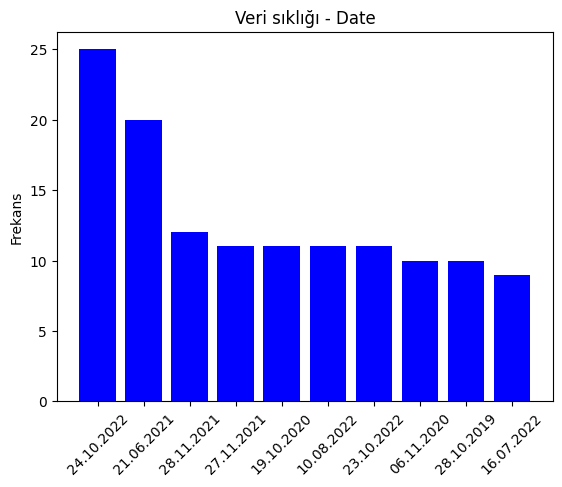

Date:
24.10.2022    25
21.06.2021    20
28.11.2021    12
27.11.2021    11
19.10.2020    11
10.08.2022    11
23.10.2022    11
06.11.2020    10
28.10.2019    10
16.07.2022     9
Name: Date, dtype: int64


In [19]:
plotBar('Date', 10)

In [20]:
date_data = entriesdf.groupby(["Date"], as_index = False).count().sort_values(by=['Entry'],ascending=False)

In [21]:
date_data.Date = pd.to_datetime(date_data.Date)

C:\Users\utku.dogan\AppData\Local\Temp\ipykernel_9916\687699979.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_data.Date = pd.to_datetime(date_data.Date)


In [22]:
date_data.Date

318   2022-10-24
269   2021-06-21
383   2021-11-28
363   2021-11-27
302   2022-10-23
         ...    
176   2022-07-14
172   2021-02-14
170   2021-01-14
169   2020-01-14
425   2022-10-31
Name: Date, Length: 426, dtype: datetime64[ns]

In [23]:
date_data.set_index('Date', inplace=True)

In [24]:
date_data

,Entry
Date,
2022-10-24,25
2021-06-21,20
2021-11-28,12
2021-11-27,11
2022-10-23,11
...,...
2022-07-14,1
2021-02-14,1
2021-01-14,1


<AxesSubplot: xlabel='Date'>

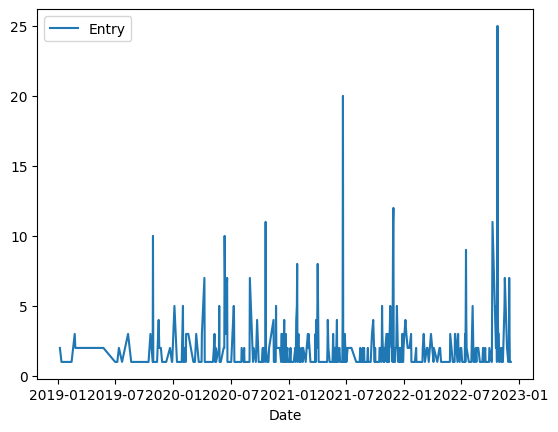

In [143]:
sns.lineplot(data = date_data)

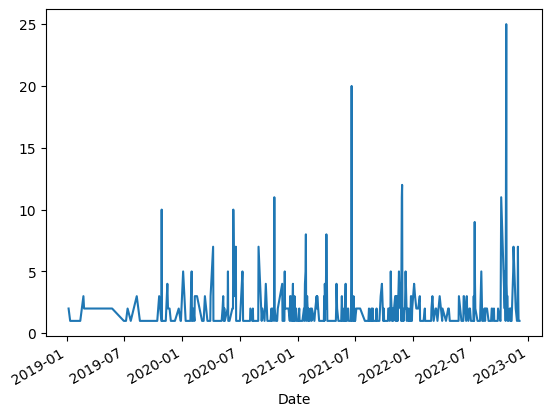

In [25]:
ax = date_data['Entry'].plot()

ticklabels = date_data.index.strftime('%Y-%m-%d')

plt.show()

In [26]:
dataset = pd.read_csv("sentiment_data.csv")


In [27]:
df = dataset.copy()
df.head()


,Unnamed: 0,Rating,Review
0,0,1.0,3 yıldır tık demedi. :)
1,1,1.0,3 yıldır kullanıyorum müthiş
2,2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [28]:
df = df.drop(['Unnamed: 0'], axis=1)

In [29]:
df = df.dropna()

In [30]:
df

,Rating,Review
0,1.0,3 yıldır tık demedi. :)
1,1.0,3 yıldır kullanıyorum müthiş
2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0.0,turkcell'den 2000 yılında new york borsasında ...
281938,0.0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0.0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0.0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [31]:
df['Rating'] = df['Rating'].astype('int64')

In [32]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0,turkcell'den 2000 yılında new york borsasında ...
281938,0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [33]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,  Dropout
from keras.preprocessing.text import Tokenizer
##from keras.preprocessing.sequence import pad_sequences

In [34]:
df['Rating'].unique().tolist()


[1, 0]

In [35]:
target = df['Rating'].values.tolist()#negatif=0, pozitif=1
data = df['Review'].values.tolist()#text verisi


In [36]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [37]:
y_test.unique().tolist()

NameError: name 'y_test' is not defined

In [38]:
seperation = int(len(data) * 0.80)
x_train, x_test = data[:seperation], data[seperation:]
y_train, y_test = target[:seperation], target[seperation:]

In [39]:
df.shape

(281459, 2)

In [40]:
num_words = 10000

In [41]:
tokenizer = Tokenizer(num_words=num_words)


In [42]:
type(data[1])

str

In [43]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [44]:
tokenizer.fit_on_texts(data)

In [45]:
import pickle

with open('turkish_tokenizer_hack.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
with open('turkish_tokenizer_hack.pickle', 'rb') as handle:
    turkish_tokenizer = pickle.load(handle)

In [47]:
x_train_tokens = turkish_tokenizer.texts_to_sequences(x_train)

In [48]:
x_train[100]


'Bu fiyata bu kalite kaçırmayın derim '

In [49]:

x_train_tokens[100]

[5, 44, 5, 143, 349, 148]

In [50]:
x_test_tokens = turkish_tokenizer.texts_to_sequences(x_test)

In [51]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens.shape

(281459,)

In [52]:
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens) 
max_tokens = int(max_tokens)
max_tokens

62

In [53]:
import tensorflow as tf

In [54]:
tf.keras.utils.pad_sequences

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [55]:
x_train_pad = tf.keras.utils.pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = tf.keras.utils.pad_sequences(x_test_tokens, maxlen=max_tokens)

In [56]:
print(x_train_pad.shape)
print(x_test_pad.shape)

(225167, 62)
(56292, 62)


In [57]:
model = Sequential()

In [58]:
embedding_size = 50 

In [59]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))


In [60]:
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=4, return_sequences=False))
model.add(Dropout(0.2))
# Dense layer: Tek nörondan oluşuyor
model.add(Dense(1, activation='sigmoid'))

In [61]:
from keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])


In [63]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 62, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 62, 16)            4288      
                                                                 
 dropout (Dropout)           (None, 62, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 62, 8)             800       
                                                                 
 dropout_1 (Dropout)         (None, 62, 8)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4)                 208       
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0

In [64]:
type(y_train)
x = np.array(y_train)
print(np.unique(x))

[0 1]


In [65]:
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)

In [66]:
model.fit(x_train_pad, y_train, epochs=10, batch_size=256)

Epoch 1/10
880/880 [==============================] - 73s 76ms/step - loss: 0.2517 - accuracy: 0.9428
Epoch 2/10
880/880 [==============================] - 67s 76ms/step - loss: 0.1307 - accuracy: 0.9570
Epoch 3/10
880/880 [==============================] - 67s 76ms/step - loss: 0.0924 - accuracy: 0.9706
Epoch 4/10
880/880 [==============================] - 66s 75ms/step - loss: 0.0722 - accuracy: 0.9781
Epoch 5/10
880/880 [==============================] - 66s 75ms/step - loss: 0.0578 - accuracy: 0.9834
Epoch 6/10
880/880 [==============================] - 67s 76ms/step - loss: 0.0486 - accuracy: 0.9868
Epoch 7/10
880/880 [==============================] - 67s 76ms/step - loss: 0.0406 - accuracy: 0.9891
Epoch 8/10
880/880 [==============================] - 63s 71ms/step - loss: 0.0356 - accuracy: 0.9909
Epoch 9/10
880/880 [==============================] - 63s 71ms/step - loss: 0.0304 - accuracy: 0.9924
Epoch 10/10
880/880 [==============================] - 67s 76ms/step - loss: 0.027

In [67]:
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)
result = model.evaluate(x_test_pad, y_test)
result

1760/1760 [==============================] - 24s 13ms/step - loss: 1.0019 - accuracy: 0.7896


[1.0018692016601562, 0.7895793318748474]

In [68]:
def predict(texts):
    tokens = turkish_tokenizer.texts_to_sequences(texts)
    tokens_pad = tf.keras.utils.pad_sequences(tokens, maxlen=max_tokens)
    return model.predict(tokens_pad)

In [69]:
texts = entriesdf['Entry'].values.tolist()
texts

[" ilker canikligil 'in kanalını flu tv ismine çevirmişler ve  olmaz öyle saçma şey  programını buraya taşımışlar https://www.youtube.com/watch?v=ouchfykxjik ",
 '( anagram )  ',
 "blu tv ile dalga gectikleri bir kac parodi bölümden sonra gerçekten bu kanala taşınmaları hoş bir sürpriz olmuş.  ama bu bile  ilker canikligil  'e özel bir kanal açılması gerekliliğini değiştirmiyor.  ",
 'blu tv virali diye diye sonunda flu tv adı altında ayrıca doğurttunuz kendilerini. takipteyiz.  ',
 'olmasaydı keşke öyle saçma şey dediğim olay. flu tv videoları zaten çok zorlama eğlenceli ya da bilgilendirici de değil. eskiden çok daha güzeldi vallla. yenilik yepalım derken sıçtılar. edit : olmaz öyle saçma tarih videoları hariç. edit: erkenci yorumum beni utandırdı. bu kanalın bir çok programını zevkle izliyorum. param olsa keşke de patreondan destek olabilsem. teşekkürler flu tv.  ',
 "milletin anasına söver gibi içerik üreten kanal. ( ilker canikligil'in game of thrones'u savunması )  ",
 ' https://

In [92]:
texts[34:35]

["garip bir kanal. konuşma tarzı ya da yaptıkları miksten ötürü  babala tv 'yi aratmıyorlar. çok zorladım kendimi ama yok olmuyor. saliseler, saniyeler içinde tonla ayrınıtıyı bulamaç edip önünüze koyuyorlar. bunun yerine geçenlerde  dilozof  diye bir arkadaş keşfettim onu dinliyorum. ne dediği anlaşılıyor, diksiyonu düzgün.  ayrıca ayrıksı konuların aynı kanal içerisinde durması fikrine ben de karşıyım. bütün youtube kanalları için söylüyorum bunu. mesela ntv gece-gündüz'ü takip etmek istiyorum adamlar bana tüm ntv programlarının takibini dayatıyorlar, e doğal olarak oraya abone olmuyorum.  "]

In [104]:
predicts = predict(texts)

28/28 [==============================] - 0s 13ms/step


In [103]:
print(predict(texts[8:9])[0])

1/1 [==============================] - 0s 33ms/step
[0.36683947]


In [98]:
texts[8:9]

['bir türlü köşeyi dönemediler. sanırım hayatları köşeyi dönmeye çalışmakla geçicek.  ']

In [264]:
from keras.models import load_model

model.save('hack_model.h5')

In [278]:
a = texts[40:42]
a

['konuşanları severek izliyorum, ahlakımı dizilere göre şekillendirmediğim için zehirlenmiyorum. fakat başlığın altı her zamanki klasik entrylerle dolmuş. düşük iq lu yazarların vazgeçemediği trend; kötüyü daha kötüsünü öne sürerek iyileştirme çabası.  ',
 ' konuşanlar  programından önce türk ahlakı süper olduğu için doğru olan önermedir. 6 yaşındaki kızla evlenmeyi ve sabah programlarındaki rezillikleri hep bu program öğretmiştir.  ']

In [108]:
predict(texts)

28/28 [==============================] - 0s 14ms/step


array([[0.7684665 ],
       [0.98421067],
       [0.9524925 ],
       [0.8376827 ],
       [0.99982643],
       [0.7823574 ],
       [0.9958085 ],
       [0.99347186],
       [0.36683944],
       [0.9991966 ],
       [0.9929612 ],
       [0.9998209 ],
       [0.99955165],
       [0.98421067],
       [0.9998205 ],
       [0.9989799 ],
       [0.99755454],
       [0.99844176],
       [0.999827  ],
       [0.9996131 ],
       [0.9998365 ],
       [0.9998354 ],
       [0.97002447],
       [0.00499308],
       [0.9993371 ],
       [0.00501429],
       [0.9998329 ],
       [0.947094  ],
       [0.99036074],
       [0.9982427 ],
       [0.9349598 ],
       [0.968369  ],
       [0.9992129 ],
       [0.89912504],
       [0.9992073 ],
       [0.9898282 ],
       [0.9995947 ],
       [0.9761899 ],
       [0.9959255 ],
       [0.6702294 ],
       [0.9966205 ],
       [0.9990502 ],
       [0.9939438 ],
       [0.9998378 ],
       [0.99524   ],
       [0.99972266],
       [0.98185307],
       [0.999

In [109]:
predicts = predict(texts)

28/28 [==============================] - 0s 13ms/step


In [111]:
predicts

array([[0.7684665 ],
       [0.98421067],
       [0.9524925 ],
       [0.8376827 ],
       [0.99982643],
       [0.7823574 ],
       [0.9958085 ],
       [0.99347186],
       [0.36683944],
       [0.9991966 ],
       [0.9929612 ],
       [0.9998209 ],
       [0.99955165],
       [0.98421067],
       [0.9998205 ],
       [0.9989799 ],
       [0.99755454],
       [0.99844176],
       [0.999827  ],
       [0.9996131 ],
       [0.9998365 ],
       [0.9998354 ],
       [0.97002447],
       [0.00499308],
       [0.9993371 ],
       [0.00501429],
       [0.9998329 ],
       [0.947094  ],
       [0.99036074],
       [0.9982427 ],
       [0.9349598 ],
       [0.968369  ],
       [0.9992129 ],
       [0.89912504],
       [0.9992073 ],
       [0.9898282 ],
       [0.9995947 ],
       [0.9761899 ],
       [0.9959255 ],
       [0.6702294 ],
       [0.9966205 ],
       [0.9990502 ],
       [0.9939438 ],
       [0.9998378 ],
       [0.99524   ],
       [0.99972266],
       [0.98185307],
       [0.999

In [112]:
type(predicts)

numpy.ndarray

In [113]:
tahmin = list()

In [114]:
for i in predicts:
    if i <0.5:
        tahmin.append("negatif")
        print("negatif")
    else:
        tahmin.append("pozitif")
        print("pozitif")
        

pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
negatif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
negatif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif


In [299]:
a = predict(['Aşk','vasat','Berbat'])

1/1 [==============================] - 0s 33ms/step
[[0.9911675 ]
 [0.07285452]
 [0.16465288]]


In [300]:
tahmin

In [115]:
entriesdf['Tahmin'] = tahmin

In [124]:
entriesdf

,Entry,Date,Tahmin
0,ilker canikligil 'in kanalını flu tv ismine ç...,22.02.2019,pozitif
1,( anagram ),22.02.2019,pozitif
2,blu tv ile dalga gectikleri bir kac parodi böl...,22.02.2019,pozitif
3,blu tv virali diye diye sonunda flu tv adı alt...,24.02.2019,pozitif
4,olmasaydı keşke öyle saçma şey dediğim olay. f...,24.02.2019,pozitif
...,...,...,...
860,arınma gecesinin üçüncü bölümünü yayınlamış ka...,05.12.2022,pozitif
861,aydaki adam programına konuk olan yaman törün...,06.12.2022,pozitif
862,aydaki adam'da yaman törüner'in sergilediği pe...,06.12.2022,pozitif
863,azalarak bitmiş youtube kanalı. emrah safa gür...,06.12.2022,pozitif


In [127]:
pd.set_option("display.max_colwidth", -1)

ValueError: Must provide an even number of non-keyword arguments

In [126]:
entriesdf

,Entry,Date,Tahmin
0,ilker canikligil 'in kanalını flu tv ismine çevirmişler ve olmaz öyle saçma şey programını buraya taşımışlar https://www.youtube.com/watch?v=ouchfykxjik,22.02.2019,pozitif
1,( anagram ),22.02.2019,pozitif
2,blu tv ile dalga gectikleri bir kac parodi bölümden sonra gerçekten bu kanala taşınmaları hoş bir sürpriz olmuş. ama bu bile ilker canikligil 'e özel bir kanal açılması gerekliliğini değiştirmiyor.,22.02.2019,pozitif
3,blu tv virali diye diye sonunda flu tv adı altında ayrıca doğurttunuz kendilerini. takipteyiz.,24.02.2019,pozitif
4,olmasaydı keşke öyle saçma şey dediğim olay. flu tv videoları zaten çok zorlama eğlenceli ya da bilgilendirici de değil. eskiden çok daha güzeldi vallla. yenilik yepalım derken sıçtılar. edit : olmaz öyle saçma tarih videoları hariç. edit: erkenci yorumum beni utandırdı. bu kanalın bir çok programını zevkle izliyorum. param olsa keşke de patreondan destek olabilsem. teşekkürler flu tv.,24.02.2019,pozitif
...,...,...,...
860,"arınma gecesinin üçüncü bölümünü yayınlamış kanal. ilk bolumu gercekten nefisi. ikinci bölüm cok da arinma gecesi baslini haketmiyor gibiydi. aytug akdogan'in kendi hakkindaki sozleri; yargilanmaktan korkmadan ya da yargilayacaklarin yargilarini sallamadan bunu dile getirebilmesi dikkatimi cekti. samimiyetini cok sevdim. ucuncu bolum...cok fazla anektod, cok fazla cikarim, akla hucum eden cok fazla dusunce var benim icin. yeniden dinlenmeyi bekleyen notlar. sevenleri izlememezlik yapmasın.",05.12.2022,pozitif
861,"aydaki adam programına konuk olan yaman törüner şimdiye kadar akp'nin ekonomi politikalarını mantıklı olarak açıklayan tek kişi olmuştur. ben akp yerinde olsa bu konuşmayı mitinglerde izletirdim. babala tv'ye çıkan metin külünk'ten 100 kat daha akp'ye faydası olmuştur bu program. metin külünk hiç bir soruya cevap vermeden boş boş konuştu, ama yaman törüner akp ekonomisini büyük resme bakarak anlattı. eskiden akp'li olan şu an kararsız olan bir çok kişiyi etkilemiştir bence. ayrıca akp trolleri şimdi flu tvci olurlar.",06.12.2022,pozitif
862,"aydaki adam'da yaman törüner'in sergilediği performansla kafası çalışan muhalif tayfanın dalga konusu olabilecek, kafası çalışmayan akepli tayfanın ise bir bok anlamayacağı bir program sergilemiştir. kafası çalışan akep'li tayfa ise ""vay bana vaylar bana"" diyerek uzaklaşmayı tercih edecektir, zira ülkenin ekonomik olarak çağ atladığı çiller döneminin merkez bankası başkanı yaman bey, özetle ""liberalizm, vatandaşın donunun dibine kadar öpülmesidir, ülkeye para girerken sorun değildi de, şimdi mi sorun oldu öpülmeniz azizim"" demiştir. eskiden akp'li olup şu an kararsız olanlar ""demek ki akp'den değilmiş olan biten, ne sikime destekledik biz bunları"" demiştir en fazla.",06.12.2022,pozitif
863,azalarak bitmiş youtube kanalı. emrah safa gürkan'ı göndermeleri ilk büyük hataları. çoğu kişi bu kanalı olmaz öyle saçma tarih serisiyle sevdi. seriyi bitirerek yanlış yaptılar. seri bittikten sonra popülerlikleri azaldı. ikinci büyük hataları erlikle uğraşmaları oldu. bu adamla uğraşan kim varsa adam hepsini bitirdi. erlikle uğraşarak kendi mezarlarını kazmış oldular. sonuçta azalarak bittiler.,06.12.2022,pozitif


In [131]:
a = ['negatif']

In [138]:
entriesdf[entriesdf.Tahmin.isin(a)][34:40]

,Entry,Date,Tahmin
319,"yeni başlayan malum oyunz programıyla ilgili eleştirilerim olacak. bunların hiçbiri ""gamer olmayanlara oyunları anlatma"" görevi verilen ali eren e yönelik değil. 17 yaşında belli ki oyun dünyasına meraklı bir arkadaş, yaşından ötürü ve moderatör'ün konuyla alakası bile olmamasından hatalı yorumlar yapması çok normal. video'nun asıl sıkıntısı video oyunlarını anlamayan ve anlamak için hiç de çabalamayan ilker canikligil ve özellikle adını bilmediğim sorular soran hanımefendidir. programda geçen bazı cümleler: ""oyunda durup manzara mı izliyosunuz gerçekten ehühüehü"" ""bilgisayar oyunlarının insanlara bir şey kattığını düşünmüyorum"" ""size bu oyunların çıkacağı haberi nereden geliyor da heyecanlanıyorsunuz"" ""oyunların felsefesi mi varmış hihihihi"" ""niye böyle olduğunuz anlaşıldı şimdi sizin, bu oyunlarda zeka gerektiren bir şey var mı"" "" 50 saat oyun mu oynuyorsun puh sana 50 saatte neler neler öğrenirsin ama onun yerine budalaca bir şehirde araba kullanmak suretiyle insanlara zarar verebilirsin tabi"" şimdi bu salak yorumlar 20 yıldır az çok oyunlarla alakası olan her gencin karşısına farklı şekillerde çıkmıştır. anlamadıkları şeylere böyle sığ yorumlar yapan 40+ yaş insanların, futboldan anlamayıp ""bir topun peşinde 22 tane adam koşuyor"" diyenlerden hiçbir farkı yok. videoya gelen tepkiler üzerine ilker canikligilin tweeti cevaplayalım: 1- yaptığın program gamer olmayan ""normal"" insanlara oyunları anlatan bir program olması amacıyla yapılmamış. ilker canikligil eğer amacın oyun dünyasını anlamak ve anlamayanlara anlatmak ise sığ yorumlarla oyun oynayanlarla dalga geçemez ve geçtirtemezsin. canikligil ve soru soran diğer hanımefendi gibi anlamadıkaları kavramlarla dalga geçen tipler 5-10 sene sonra kendileriyle dalga geçilecek duruma düşeceklerinin farkında değiller. 2- sen gamerlık hakkında bir video yapıyorsan, onu gamerlar tabiki izleyecek ve eleştireceklerdir. bir de bunun üstüne aşağılarcasına ""biz gamerlara program yapmıyoruz"" diye tweet atman senin gibi entellektüel geçinen bir adama hiç yakışmıyor. son sözüm ali eren'e olsun. eleştirilere aldırma canını sıkma. videonun başarısız olması senin hatan değil. hata soru sorar gibi yapıp salak yorumlarla oyunlarla alay eden ilker canikligil ve ekibinde. anladığım kadarıyla kişisel tanışıklığınız var fakat yerinde olsam bu serinin ilerleyen bölümlerine devam etmezdim çünkü hepsi aynı kafayla çekilecek.",31.01.2021,negatif
330,"gerizekalı bir ekşi yazarı, olan biteni zerre kadar anlama yetisi olmadığı için abuk subuk bi yorum yapmış. ciddi anlamda gerizekalı dedim, küfür olarak degil. aşağı bak/aşağıdan meselesini anlamamış önce. açıklayalım. videoda ilk basta aşaği bak dedi diye anlaşılıp öyle yayilan ve bu şekliyle yeni bi slogana dönusen bu laf yasanan olayın ötesine geçti. orda sloganın ortaya çıkmasının sebebi aşaği bakıp bakmamak degil abilerinden emir aldığı için ogrencilere efelenmekte beis gormeyen onları hırpalayan ite kaka bağırıp çağıran 5 para etmicek insanların uyguladıgı şiddet. bütün bunlar aynıyken ilk başta video aşağidan diye anlaşılsaydı slogan da böyle oluşurdu. önemli olan duyulan degil görülen, yaşanan yani aklı kıt sözlük yazarı arkadaş. ikinci olarak, boğaziçindeki ögrenciler rektörü biz seçelim demiyolar zaten. ama eminim bunun gibi bi aptal rektorü kendi belirlemek isterdi. boğaziçinde istenen şey de akademisyenlerin oylarıyla üniversite içinden birinin seçilmesi. ayrıca sanırım zeka sorunu olduğu için anlayamamış ama paylaştıgı linkte de bazı yerlerde ögenci temsilcileri rektörlük seçimine katılıyomus.",04.02.2021,negatif
332,"ilker canikligil'in düşüncelerini ve kanalın içeriklerini sevdiğimi ve abone olduğumu baştan belirterek yapıcı bir eleştiride bulunmak isterim. sosyal medya uzmanınız kim bilmiyorum ama, onlarca insta story atınca içerik büyüsünü kaybediyor. az sayıda ve öz storyler atmaya devam ederseniz önceden olduğu gibi, izlenmesi istenilen içerik daha fazla ilgi çeker. bu şekilde, çekiliş yapan ve ko

In [140]:
import seaborn as sns

Text(0.5, 1.0, 'olumlu - olumsuz sayısı')

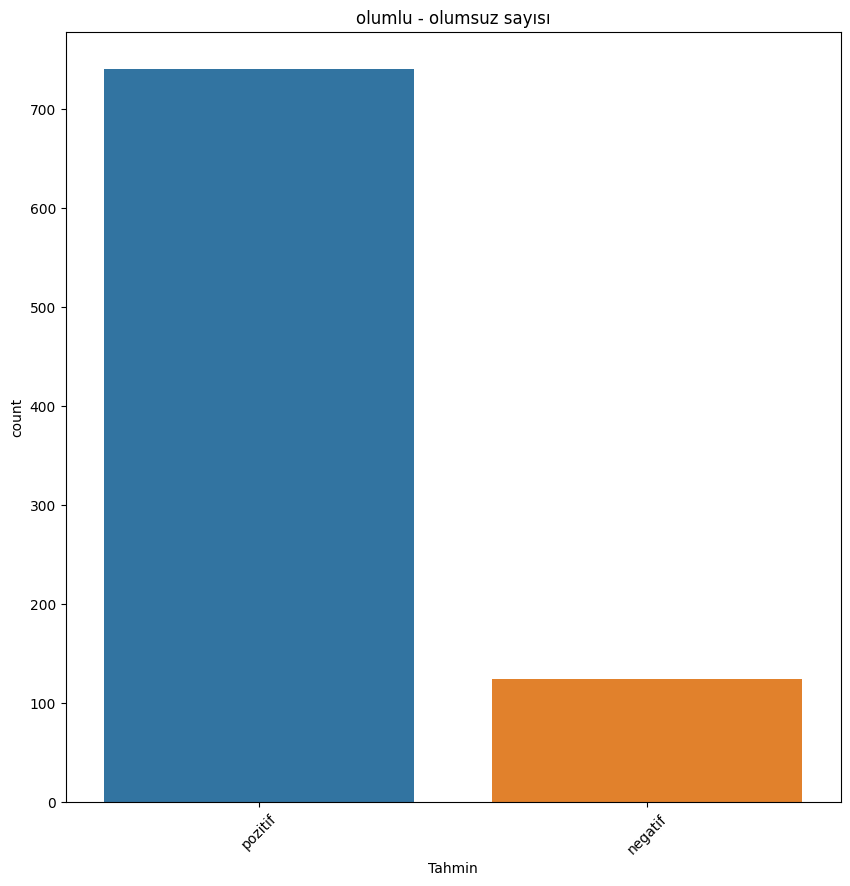

In [142]:
plt.figure(figsize=(10,10))
sns.countplot(x='Tahmin',data=entriesdf,)
plt.xticks(rotation=45)
plt.title("olumlu - olumsuz sayısı")